# Blackjack Simulator

### Game Helper Functions

In [1]:
import random

def check_ace(hand): 
    """
    Checks if there's an ace in the hand in case total went over 21
    """
    if 'A' in hand:
        hand[hand.index('A')] = 'A.'
        return True
    else:
        return False
    

def hand_total(hand): 
    """
    Calculates sum total values from a list of strings using a dictionary
    """
    d_val = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, 
             '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11, 'A.': 1}
    return int(sum(d_val[i] for i in hand))


def deal_card(hand, deck, num_of_cards=1): 
    """
    Deals a card, defaulted to one card
    """
    for _ in range(num_of_cards):
        hand.append(deck.pop())
    return hand


def create_deck(num_of_decks=1): 
    """
    Creates a standard playing card deck, defaulted to one deck
    """
    deck = ['2','3','4','5','6','7','8','9','10','J','Q','K','A']*4*num_of_decks
    random.shuffle(deck)
    return deck
    

def play_again():
    """
    Loops the game
    """
    while True: # Asking the player to play again or not
        ans = input("Play again? \n").lower()
        if ans == 'yes' or ans == 'y':
            return True
        elif ans == 'no' or ans == 'n':
            return False
        else:
            print("Yes or no? ")
            continue
            

#### Player Turn Function

In [2]:
def player_move(your_hand, limit, true_cnt, dealer_hand):
    """
    Chooses 'hit' or 'stay' depending on the limit set and count
    """
    
    dtotal = hand_total(dealer_hand[:1])

    # Meaning there are plenty of face cards left
    if true_cnt > 0:
        if hand_total(your_hand) >= limit:
            return 'stay'
        elif hand_total(your_hand) < limit:
            return 'hit'
        elif dtotal >= 10:
            return 'stay'
        
        
    # Meaning there are plenty of low cards left: < 6 value
    elif true_cnt < 0:
        if hand_total(your_hand) <= limit:
            return 'hit'
        elif hand_total(your_hand) > limit:
            return 'stay'
        elif dtotal < 10:
            return 'hit'
        
        
    # Meaning the count is neutral so play a basic strategy    
    else:
        if hand_total(your_hand) >= 17:
            return 'stay'
        elif hand_total(your_hand) < 17:
            return 'hit'
        

#### Dealer Turn Function

In [3]:
def dealer_turn(your_hand, dealer_hand, total, dtotal, deck, r_count, true_cnt, strategy, turn=True): 
    """
    Activates the dealer's turn if player's move was 'stay'
    """
    # Tallying wins, losses, and draws
    wins = 0
    draw = 0
    loss = 0
    high_wins = 0
    neutral_wins = 0
    low_wins = 0
    
    # Looping through the moves
    while turn:
        total  = hand_total(your_hand)
        if total > 21: 
            
            # Evaluating a player's hand to see if they have an ace
            check_ace(your_hand)
            total = hand_total(your_hand)
            continue
            
        dtotal = hand_total(dealer_hand)

        # Dealing cards to the dealer if they have less than or equal to 16
        while dtotal <= 16: 
            deal_card(dealer_hand, deck)
            dtotal = hand_total(dealer_hand)
            
            # Counter
            r_count += card_counter(dealer_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
        # Checking if the dealer wins
        if dtotal == 21: 
            loss += 1
            break

        # Checking if the dealer busts
        elif dtotal > 21: 
            if check_ace(dealer_hand):
                continue
            else:
                wins += 1
                if total < 10:
                    low_wins += 1
                elif total >= 10 & total < 17:
                    neutral_wins += 1
                elif total >= 17:
                    high_wins += 1
                break
                
        # Comparing dealer hand to player hand
        elif 17 <= dtotal <= 21: 
            if dtotal > total:
                loss += 1
                break
            elif dtotal < total:
                wins += 1
                break
            elif dtotal == total:
                draw += 1
                break
            else:
                wins += 1
                break
    return [wins, loss, draw, r_count, true_cnt]

### Card Counter - Create strat matrix

In [4]:
import pandas as pd

# Creating a simple dictionary to start the values
vals = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, 
            '7': 0, '8': 0, '9': 0, '10': -1, 'J': -1, 
            'Q': -1, 'K': -1, 'A': -1, 'A.': -1}

# Converting to a DataFrame
df = pd.DataFrame(vals, index=[0])

# Adding in values to each row in the DF
df.loc[len(df), :] = [0,1,1,1,1,0,0,0,-1,-1,-1,-1,0,0]
df.loc[len(df), :] = [1,1,2,2,1,1,0,0,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,1,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,-1,-2,-2,-2,-2,0,0]
df.loc[len(df), :] = [1,1,1,1,1,0,0,0,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [.5,1,1,1.5,1,.5,0,-.5,-1,-1,-1,-1,-1,-1]
df.loc[len(df), :] = [1,1,2,2,2,1,0,0,-2,-2,-2,-2,-1,-1]
df.loc[len(df), :] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Renaming the index for each row
df.rename({0: 'Hi-Lo',
           1: 'Hi-Opt I',
           2: 'Hi-Opt II',
           3: 'KO',
           4: 'Omega II',
           5: 'Red 7',
           6: 'Halves',
           7: 'Zen Count',
           8: 'No Strategy'}, inplace=True)

#### Dataframe Preview

In [5]:
df

,2,3,4,5,6,7,8,9,10,J,Q,K,A,A.
Hi-Lo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Hi-Opt I,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
Hi-Opt II,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0
KO,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Omega II,1.0,1.0,2.0,2.0,2.0,1.0,0.0,-1.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0
Red 7,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Halves,0.5,1.0,1.0,1.5,1.0,0.5,0.0,-0.5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
Zen Count,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0
No Strategy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Save DF as pickle

In [6]:
df.to_pickle('Card_Counting_Values')

### Card Counter Functions

In [7]:
import pandas as pd
df = pd.read_pickle('Card_Counting_Values')

def card_counter(hand, strategy='Hi-Lo'):
    """
    Counting cards based on strategy selected
    Returns sum of the values
    """
    return sum(list(map(lambda i: df.loc[strategy][i].item(), hand)))

def true_counter(deck, r_count):
    """
    Calculates and returns the true count rounded down
    """
    try:
        return round(r_count/(len(deck)//52))
    except:
        # Compensating for when there is less than 52 cards or 1 deck left
        return r_count

### Main Blackjack Loop

In [8]:
def blackjack(deck, limit, r_count, true_cnt, strategy):
    """
    Playing Blackjack
    """
    your_hand   = deal_card([], deck, 2)
    dealer_hand = deal_card([], deck, 2)
    
    # Tallying wins, losses, and draws
    wins = 0
    draw = 0
    loss = 0
    high_wins = 0
    neutral_wins = 0
    low_wins = 0
    
    # Card Counting
    r_count  += card_counter(your_hand, strategy) + card_counter(dealer_hand[:1], strategy)
    true_cnt  = true_counter(deck, r_count)
    
    # Looping through the moves
    while len(deck) > 1:
        
        # Checking if the player has a natural blackjack
        if hand_total(your_hand) == 21 and hand_total(dealer_hand) < 21:
            
            # Card Counting
            r_count  += card_counter(dealer_hand[-1:], strategy)
            true_cnt  = true_counter(deck, r_count)
            
            wins += 1
            # if hand_total(your_hand) < 10:
            #     low_wins += 1
            # elif hand_total(your_hand) >= 10 & hand_total(your_hand) < 17:
            #     neutral_wins += 1
            # elif hand_total(your_hand) >= 17:
            #     high_wins += 1
            break
        
        # Checking if the player and the dealer tie if they both have natural blackjacks
        elif hand_total(your_hand) == 21 and hand_total(dealer_hand) == 21:
            
            # Counter
            r_count += card_counter(dealer_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
            draw += 1
            # if hand_total(your_hand) < 10:
            #     low_wins += 1
            # elif hand_total(your_hand) >= 10 & hand_total(your_hand) < 17:
            #     neutral_wins += 1
            # elif hand_total(your_hand) >= 17:
            #     high_wins += 1
            break
        
        # Allowing the player to make a move
        move = player_move(your_hand, limit, true_cnt, dealer_hand)
        
        if move == "hit":
            prev_total = hand_total(your_hand)
            deal_card(your_hand, deck)
            total = hand_total(your_hand)
            
            # Counter
            r_count += card_counter(your_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
            # Checking if the player busts
            if  total > 21:              
                # Checking for an ace in the player hand
                if check_ace(your_hand): 
                    total = hand_total(your_hand)
                    continue
                # Otherwise they bust
                else:                    
                    loss += 1
                    break
            elif total < 21:             
                # Going back to asking the player for a move
                continue
            # Checking if the player succeeded in achieving blackjack
            elif total == 21:            
                wins += 1
            if prev_total < 10:
                low_wins += 1
            elif prev_total >= 10 & prev_total < 17:
                neutral_wins += 1
            elif prev_total >= 17:
                high_wins += 1
                break
        elif move == "stay":
            total  = hand_total(your_hand)
            dtotal = hand_total(dealer_hand)
            
            # Counter
            r_count += card_counter(dealer_hand[-1:], strategy)
            true_cnt = true_counter(deck, r_count)
            
            # Running the function for the dealer's turn
            result = dealer_turn(your_hand, dealer_hand, total, dtotal, deck, r_count, true_cnt, strategy)
            
            # The results of the dealer's turn
            wins += result[0]
            loss += result[1]
            draw += result[2]
            
            # Counter 
            r_count  = result[3]
            true_cnt = result[4]
            break
            
    # Returning the results of the game
    return [wins, loss, draw, r_count, true_cnt, high_wins, neutral_wins, low_wins]

### Play Blackjack

In [9]:
def play_blackjack(limit, strategy):
    """
    Looping the game until no cards left
    """
    deck = create_deck(6)
    
    wins = []
    draw = []
    loss = []
    high_wins = []
    neutral_wins = []
    low_wins = []
    rounds_played = 0
    
    r_count = 0
    true_cnt = 0
        
    while True:
        
        # Running blackjack
        game = blackjack(deck, limit, r_count, true_cnt, strategy)
        
        # Recording the results: wins, loss, draw, counts
        wins.append(game[0])
        loss.append(game[1])
        draw.append(game[2])
        high_wins.append(game[5])
        neutral_wins.append(game[6])
        low_wins.append(game[7])
        rounds_played += 1
        
        r_count = game[3]
        true_cnt = game[4]
                        
        # Determining if there are enough cards left
        if len(deck) < 12:
            break
    return [wins, draw, loss, rounds_played, high_wins, neutral_wins, low_wins]

### Simulate games

In [39]:
# Declaring variables for use
results      = {}
high_hand_winrate = {}
neutral_hand_winrate = {}
low_hand_winrate = {}
draw_rate = {}
win_rate = {}
winnings     = 0
only_win = 0
total_games  = 0
games_sim    = 100
rec_rounds   = 10
limit        = 16
strategies   = list(df.index)
strategies.append(df.index[0])
#random.shuffle(strategies) # shuffling the index for more randomization


# Looping through the various strategies we have
for strat in strategies:
    print(f"Simulating {strat}")
    
    results[f"{strat}"] = []    
    high_hand_winrate[f"{strat}"] = []    
    neutral_hand_winrate[f"{strat}"] = []    
    low_hand_winrate[f"{strat}"] = []
    draw_rate[f"{strat}"] = []
    win_rate[f"{strat}"] = []
    high_wins = 0    
    neutral_wins = 0
    low_wins = 0
    draws = 0
    c = games_sim
    
    # Simulating the games with a specific strategy
    for _ in range(games_sim):
        bj = play_blackjack(limit, strat)

        # Recording only the last N rounds played in order to 
        # account for the effectiveness of the card counting technique
        last_wins    = sum(bj[0][-rec_rounds:])
        last_draws   = sum(bj[1][-rec_rounds:])
        draws   += sum(bj[1][-rec_rounds:])
        high_wins   += sum(bj[4][-rec_rounds:])
        neutral_wins   += sum(bj[5][-rec_rounds:])
        low_wins   += sum(bj[6][-rec_rounds:])
        winnings    += last_wins+last_draws
        only_win += last_wins
        total_games += rec_rounds

        wp = round((winnings/total_games)*100, 4)
        owp = round((only_win/total_games)*100, 4)
        dp = round((draws/total_games)*100, 4)
        results[f"{strat}"].append(wp)
        draw_rate[f"{strat}"].append(dp)
        win_rate[f"{strat}"].append(owp)
        high_hand_winrate[f"{strat}"] = (high_wins)
        neutral_hand_winrate[f"{strat}"] = (neutral_wins)
        low_hand_winrate[f"{strat}"] = (low_wins)

        print(f"High Wins: {high_wins}, Low wins: {low_wins}, Neutral wins: {neutral_wins}")
        c -= 1
        print(c, end=" ")
                
    print(f"\nCompleted {strat}\n")
    
    if strat == strategies[-1]:
        print(f"SIMULATED ALL STRATEGIES {games_sim} TIMES EACH")
        
        
games_sim = list(range(games_sim))

Simulating Hi-Lo
High Wins: 0, Low wins: 0, Neutral wins: 0
99 High Wins: 0, Low wins: 0, Neutral wins: 1
98 High Wins: 0, Low wins: 0, Neutral wins: 1
97 High Wins: 0, Low wins: 0, Neutral wins: 1
96 High Wins: 0, Low wins: 0, Neutral wins: 2
95 High Wins: 0, Low wins: 0, Neutral wins: 3
94 High Wins: 0, Low wins: 0, Neutral wins: 3
93 High Wins: 0, Low wins: 0, Neutral wins: 4
92 High Wins: 0, Low wins: 0, Neutral wins: 4
91 High Wins: 0, Low wins: 0, Neutral wins: 5
90 High Wins: 0, Low wins: 0, Neutral wins: 7
89 High Wins: 0, Low wins: 0, Neutral wins: 9
88 High Wins: 0, Low wins: 0, Neutral wins: 9
87 High Wins: 0, Low wins: 0, Neutral wins: 11
86 High Wins: 0, Low wins: 0, Neutral wins: 12
85 High Wins: 0, Low wins: 0, Neutral wins: 14
84 High Wins: 0, Low wins: 0, Neutral wins: 16
83 High Wins: 0, Low wins: 0, Neutral wins: 17
82 High Wins: 0, Low wins: 0, Neutral wins: 17
81 High Wins: 0, Low wins: 0, Neutral wins: 18
80 High Wins: 0, Low wins: 0, Neutral wins: 18
79 High Wins

### Graphing Results

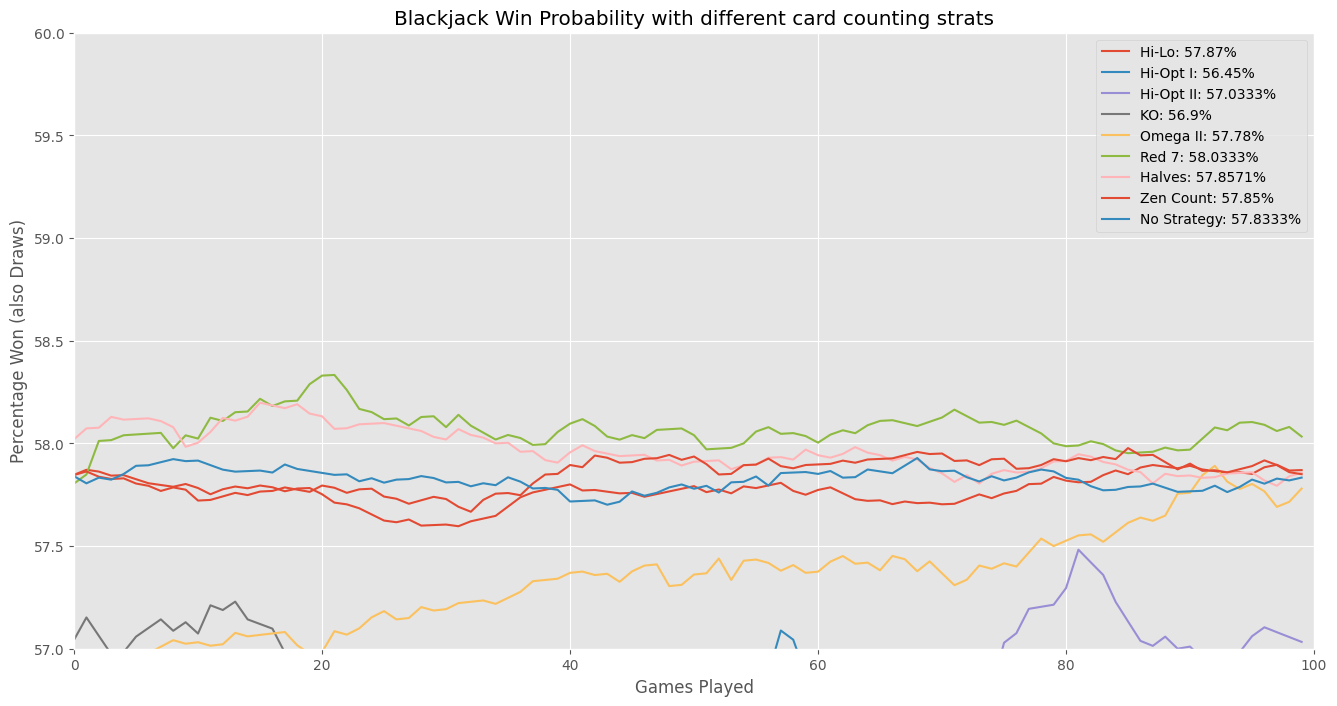

In [40]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,8))

# Sort results
ival = 0

# Plotting each strategies result
for i in results:
    plt.plot(games_sim, results[i], label=i+': '+str(results[i][-1])+'%')
    
plt.title("Blackjack Win Probability with different card counting strats")
plt.ylabel("Percentage Won (also Draws)")
plt.xlabel("Games Played")
plt.ylim([57,60])
plt.xlim([0,len(games_sim)])
plt.legend()
#plt.savefig("Blackjack_Analysis.png")
plt.show()

### Data Analysis

#### Average Winrate

In [41]:
def get_avg_winrate(strategy="No Strategy"):
    total_winrate = 0
    avg_winrate = []
    for k in results[strategy]:
        total_winrate += k
    avg = total_winrate/len(results[i])
    avg_winrate.append(avg)
    return round(avg, 2)

def get_avg_drawrate(strategy="No Strategy"):
    total_drawrate = 0
    avg_drawrate = []
    for k in draw_rate[strategy]:
        total_drawrate += k
    avg = total_drawrate/len(draw_rate[i])
    avg_drawrate.append(avg)
    return round(avg, 2)

def get_all_avg_winrate():
    total_winrate = 0
    avg_winrate = []
    for i in results:
        for k in results[i]:
            total_winrate += k
            avg = total_winrate/len(results[i])
        avg_winrate.append(round(avg, 2))
        avg = 0
        total_winrate = 0
    return avg_winrate

def get_all_avg_drawrate():
    total_drawrate = 0
    avg_drawrate = []
    for i in draw_rate:
        for k in draw_rate[i]:
            total_drawrate += k
            avg = total_drawrate/len(draw_rate[i])
        avg_drawrate.append(round(avg, 2))
        avg = 0
        total_drawrate = 0
    return avg_drawrate

def get_all_avg_only_winrate():
    total_winrate = 0
    avg_winrate = []
    for i in win_rate:
        for k in win_rate[i]:
            total_winrate += k
            avg = total_winrate/len(win_rate[i])
        avg_winrate.append(round(avg, 2))
        avg = 0
        total_winrate = 0
    return avg_winrate

    
    

print(get_avg_winrate("Hi-Lo"))
print(get_all_avg_winrate())
print(get_avg_drawrate("Hi-Lo"))
print(get_all_avg_drawrate())
print(get_all_avg_only_winrate())

57.77
[57.77, 55.99, 56.69, 56.81, 57.33, 58.07, 57.97, 57.85, 57.82]
0.5
[0.5, 3.12, 1.86, 1.11, 1.03, 0.72, 0.61, 0.55, 0.56]
[49.14, 47.34, 47.43, 47.82, 48.39, 49.19, 49.3, 49.19, 49.23]


#### Order avg winrate

In [13]:
from collections import OrderedDict
import numpy as np
import pandas as pd
def sort_winrates():
    awrs = {}
    for i in strategies:
        
        awrs[f"{i}"] = (get_avg_winrate(i))

    # Sort the winrates in ascending order
    keys = list(awrs.keys())
    values = list(awrs.values())
    sorted_value_index = np.argsort(values, kind="quicksort")
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    return(sorted_dict)


#### Winrate based on hand

In [14]:
def get_strat_high_winrate(strategy="No Strategy"):
    total_winrate = 0
    avg_winrate = []
    for k in high_hand_winrate[strategy]:
        total_winrate += k
    avg = total_winrate/len(results[i])
    avg_winrate.append(avg)
    return round(avg, 2)

def get_high_hand_winrate():
    hwr = {}
    for g in strategies:
        hwr[f"{g}"] = get_strat_high_winrate(g)
        keys = list(hwr.keys())
        values = list(hwr.values())
        sorted_dict = {keys[g]: values[g] for g in values}

    return(sorted_dict)

print(high_hand_winrate, neutral_hand_winrate, low_hand_winrate)


{'Hi-Lo': 0, 'Hi-Opt I': 0, 'Hi-Opt II': 0, 'KO': 0, 'Omega II': 0, 'Red 7': 0, 'Halves': 0, 'Zen Count': 0, 'No Strategy': 0} {'Hi-Lo': 71, 'Hi-Opt I': 44, 'Hi-Opt II': 79, 'KO': 52, 'Omega II': 71, 'Red 7': 74, 'Halves': 77, 'Zen Count': 78, 'No Strategy': 72} {'Hi-Lo': 0, 'Hi-Opt I': 0, 'Hi-Opt II': 0, 'KO': 0, 'Omega II': 0, 'Red 7': 0, 'Halves': 0, 'Zen Count': 0, 'No Strategy': 0}


### Run Analysis

In [43]:
#test sort
def get_avg_winrates_dataframe():
    df_avg_winrate = pd.DataFrame(sort_winrates(), index=[0])
    df_avg_winrate.loc[len(df_avg_winrate), :] = get_all_avg_only_winrate()
    df_avg_winrate.loc[len(df_avg_winrate), :] = get_all_avg_drawrate()
    df_avg_winrate.loc[len(df_avg_winrate), :] = neutral_hand_winrate
    df_avg_winrate.rename({0: 'Avg Total Winrate%',
                           2: 'Avg Drawrate%',
                           1: 'Avg Winrate%',
                           3: 'Avg Neutral Hand Winrate%'
                           }, inplace=True)
    
    return df_avg_winrate

get_avg_winrates_dataframe()

,Hi-Opt I,Hi-Opt II,KO,Omega II,Hi-Lo,No Strategy,Zen Count,Halves,Red 7
Avg Total Winrate%,55.99,56.69,56.81,57.33,57.77,57.82,57.85,57.97,58.07
Avg Winrate%,49.14,47.34,47.43,47.82,48.39,49.19,49.30,49.19,49.23
Avg Drawrate%,0.50,3.12,1.86,1.11,1.03,0.72,0.61,0.55,0.56
Avg Neutral Hand Winrate%,59.00,73.00,66.00,71.00,66.00,60.00,73.00,64.00,76.00
